In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:


pd.set_option('display.max_columns', None)

df = pd.read_csv("Dataset/Grega/dataset_small.csv")
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


In [4]:
# Split Data

X = df.drop(columns=['phishing'])
y = df['phishing']

# y.isnull().sum()
# X.head()

print(X.shape)
print(y.shape)
y.head()

(58645, 111)
(58645,)


0    0
1    0
2    0
3    1
4    1
Name: phishing, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

In [6]:
#Split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46916, 111)
(11729, 111)
(46916,)
(11729,)


In [7]:
#Define the model
ran_forest = RandomForestClassifier(random_state=0)

In [8]:
#Fit the model
ran_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [9]:
# predict
y_pred_ranforest = ran_forest.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred_ranforest))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5563
           1       0.96      0.96      0.96      6166

    accuracy                           0.96     11729
   macro avg       0.96      0.96      0.96     11729
weighted avg       0.96      0.96      0.96     11729



In [11]:
def plot_confusion_matrix(cm, classes = None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30}, fmt='.2%', cmap='Blues')
    else:
        sns.heatmap(cm, vmin=0., vmax=1., fmt='.2%')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

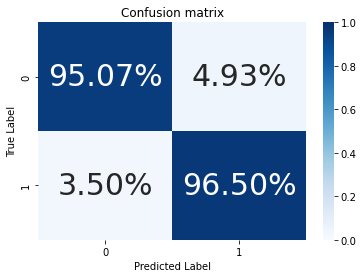

In [12]:
cm = confusion_matrix(y_test, y_pred_ranforest)
cm_perc = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_perc, classes = ran_forest.classes_, title='Confusion matrix')

In [13]:
fi_col_rf = []
fi_rf = []

for i,column in enumerate(df.drop('phishing', axis = 1)):
    print(f'The feature importance for {column} is: {ran_forest.feature_importances_[i]}')

    fi_col_rf.append(column)
    fi_rf.append(ran_forest.feature_importances_[i])

The feature importance for qty_dot_url is: 0.01287669348808965
The feature importance for qty_hyphen_url is: 0.00909181288661571
The feature importance for qty_underline_url is: 0.0020656013959128583
The feature importance for qty_slash_url is: 0.04075983909990376
The feature importance for qty_questionmark_url is: 5.1637235190815425e-05
The feature importance for qty_equal_url is: 0.0009964123694478208
The feature importance for qty_at_url is: 0.0002990705789188907
The feature importance for qty_and_url is: 0.00039228333764696865
The feature importance for qty_exclamation_url is: 9.185839358030984e-05
The feature importance for qty_space_url is: 5.244081539626325e-06
The feature importance for qty_tilde_url is: 0.0001283709967036846
The feature importance for qty_comma_url is: 9.676713636247852e-05
The feature importance for qty_plus_url is: 0.0002808823998645611
The feature importance for qty_asterisk_url is: 4.842377907587046e-05
The feature importance for qty_hashtag_url is: 3.7964

In [26]:
pd.set_option('display.max_rows', 500)
fi_df = zip(fi_col_rf, fi_rf)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance'])

# ordering the importance
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
# # keep important data
fi_df
# column_to_keep = fi_df['Feature'][:98]
# column_to_keep

,index,Feature,Feature Importance
0,100,time_domain_activation,9.135512e-02
1,57,directory_length,8.853342e-02
2,43,qty_slash_directory,4.663831e-02
3,18,length_url,4.117480e-02
4,3,qty_slash_url,4.075984e-02
5,105,ttl_hostname,3.461779e-02
6,99,asn_ip,3.190090e-02
7,97,time_response,3.179975e-02
8,75,file_length,3.050829e-02
9,101,time_domain_expiration,2.821878e-02


In [17]:
# split data

print(df.shape)
print(df[column_to_keep].shape)

X = df[column_to_keep].values
X

print(X.shape)
print(y.shape)

(58645, 112)
(58645, 98)
(58645, 98)
(58645,)


In [18]:
#Split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46916, 98)
(11729, 98)
(46916,)
(11729,)


In [19]:
# Grid Search with Cross Validation approach

max_depth = np.arange(14, 19, 2)
max_features_range = np.arange(16,23,3)
n_estimators_range = np.arange(40,60,10)
param_grid_rf = dict(max_features=max_features_range, n_estimators=n_estimators_range, max_depth=max_depth)

rf = RandomForestClassifier(random_state=0)

# n-jobs -1 untuk memakai semua processor
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3)

In [20]:
# Fit the model
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 5/5] END max_depth=14, max_features=16, n_estimators=40;, score=0.952 total time=   3.1s
[CV 1/5] END max_depth=14, max_features=16, n_estimators=40;, score=0.948 total time=   3.2s
[CV 2/5] END max_depth=14, max_features=16, n_estimators=40;, score=0.945 total time=   3.4s
[CV 3/5] END max_depth=14, max_features=16, n_estimators=40;, score=0.948 total time=   3.3s
[CV 4/5] END max_depth=14, max_features=16, n_estimators=40;, score=0.946 total time=   3.4s
[CV 1/5] END max_depth=14, max_features=16, n_estimators=50;, score=0.949 total time=   4.2s
[CV 2/5] END max_depth=14, max_features=16, n_estimators=50;, score=0.947 total time=   4.3s
[CV 3/5] END max_depth=14, max_features=16, n_estimators=50;, score=0.949 total time=   4.2s
[CV 1/5] END max_depth=14, max_features=19, n_estimators=40;, score=0.949 total time=   4.5s
[CV 2/5] END max_depth=14, max_features=19, n_estimators=40;, score=0.947 total time=   4.7s
[CV 4/5] 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([14, 16, 18]),
                         'max_features': array([16, 19, 22]),
                         'n_estimators': array([40, 50])},
             verbose=3)

In [21]:
print("The best parameters are %s with a score of %0.2f" % (rf_grid.best_params_, rf_grid.best_score_))

The best parameters are {'max_depth': 18, 'max_features': 22, 'n_estimators': 50} with a score of 0.95


In [22]:
y_pred_rfgrid = rf_grid.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred_rfgrid))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5563
           1       0.95      0.96      0.96      6166

    accuracy                           0.96     11729
   macro avg       0.96      0.95      0.96     11729
weighted avg       0.96      0.96      0.96     11729



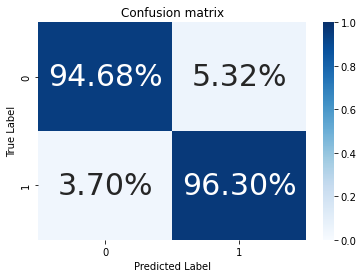

In [24]:
cm = confusion_matrix(y_test, y_pred_rfgrid)
cm_perc = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_perc, classes = rf_grid.classes_, title='Confusion matrix')

In [37]:
test_data = [2,
 7,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 76,
 2,
 0,
 0,
 0,
 6,
 21,
 0,
 0,
 0,
 7,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 46,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.127992,
 0,
 20940,
 4892,
 2779,
 1,
 4,
 0,
 172800,
 1,
 0,
 1,
 1,
 0]




In [46]:
test_data2 = [5,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 62,
 4,
 0,
 0,
 0,
 10,
 34,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 257,
 109,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [50]:
test_data2 = np.array(test_data2, dtype=float)
# test_data = test_data.reshape(1, -1) 
test_data2 = test_data2.reshape(1, -1) 

In [51]:
test_pred_rf = rf_grid.predict(test_data2)
print(test_pred_rf)

[1]


In [52]:
import joblib

filename = 'rf_final'
joblib.dump(rf_grid, filename)

['rf_final']

In [54]:
rf_final = joblib.load('Model/rf_final')

In [55]:
test_pred_rf = rf_final.predict(test_data2)
print(test_pred_rf)

[1]
